## MM

2024-04-05 17:37:41.411 WARNING legend - _parse_legend_args: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


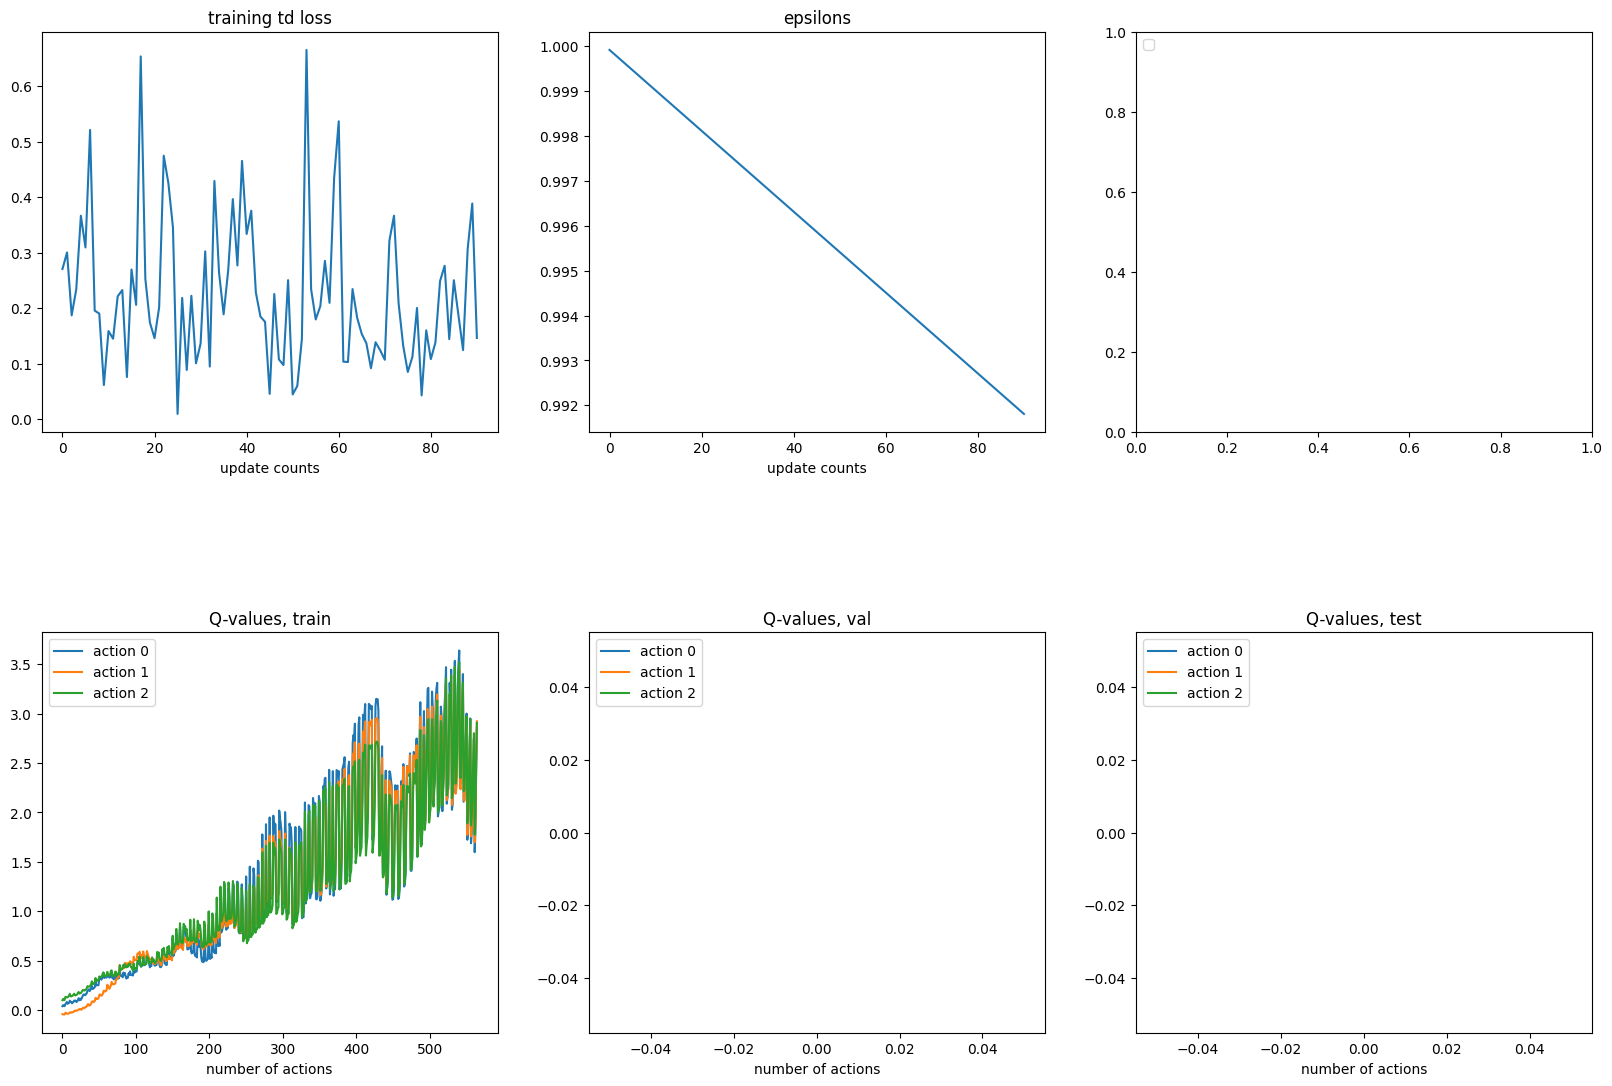

In [1]:
from agent import DQNMMAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    num_iterations = 100 * 100
    question_interval = 1
    deterministic_objects = True
    room_size = "l"
    terminates_at = 99
    if deterministic_objects:
        root_dir = f"./training-results/deterministic-objects/DQN/"
    else:
        root_dir = f"./training-results/stochastic-objects/DQN/"

    default_root_dir = (
        root_dir
        + f"mm/{room_size}/{terminates_at+1}-question_interval={question_interval}"
    )

    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": num_iterations,
        "replay_buffer_size": num_iterations,
        "warm_start": num_iterations // 10,
        "batch_size": 32,
        "target_update_interval": 10,
        "epsilon_decay_until": num_iterations,
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": 0.98,
        "capacity": {
            "episodic": 16,
            "semantic": 16,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "plotting_interval": 10,
        "train_seed": random.randint(0, 1000),
        "test_seed": random.randint(0, 1000),
        "device": "cpu",
        "qa_policy": "episodic_semantic",
        "explore_policy": "avoid_walls",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": question_interval,
            "include_walls_in_observations": True,
            "deterministic_objects": False,
        },
        "ddqn": True,
        "dueling_dqn": False,
        "default_root_dir": default_root_dir,
        "run_handcrafted_baselines": False,
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = DQNMMAgent(**params)
    agent.train()

## Explore

In [ ]:
from agent import DQNExploreAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    num_iterations = 100 * 100
    question_interval = 1
    deterministic_objects = True
    room_size = "l"
    terminates_at = 99

    if deterministic_objects:
        root_dir = f"./training-results/deterministic-objects/DQN/"
    else:
        root_dir = f"./training-results/stochastic-objects/DQN/"

    default_root_dir = (
        root_dir
        + f"explore/{room_size}/{terminates_at+1}-question_interval={question_interval}"
    )

    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": num_iterations,
        "replay_buffer_size": num_iterations,
        "warm_start": num_iterations // 10,
        "batch_size": 32,
        "target_update_interval": 10,
        "epsilon_decay_until": num_iterations,
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": 0.9,
        "capacity": {
            "episodic": 16,
            "episodic_agent": 0,
            "semantic": 16,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": random.randint(0, 1000),
        "test_seed": random.randint(0, 1000),
        "device": "cpu",
        "mm_policy": "neural",
        "mm_agent_path": "./training-results/stochastic-objects/DQN/mm/l/100-question_interval=1/2024-04-04 19:03:29.277896/agent.pkl",
        "qa_policy": "episodic_semantic",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": question_interval,
            "include_walls_in_observations": True,
            "deterministic_objects": False,
        },
        "ddqn": True,
        "dueling_dqn": False,
        "default_root_dir": default_root_dir,
        "run_neural_baseline": False,
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = DQNExploreAgent(**params)
    agent.train()

## DQN baselines LSTM 

In [ ]:
from agent import DQNLSTMBaselineAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    num_iterations = 100 * 100
    question_interval = 1
    deterministic_objects = True
    room_size = "l"
    terminates_at = 99

    if deterministic_objects:
        root_dir = f"./training-results/deterministic-objects/DQN/"
    else:
        root_dir = f"./training-results/stochastic-objects/DQN/"

    default_root_dir = (
        root_dir
        + f"baselines/{room_size}/{terminates_at+1}-question_interval={question_interval}"
    )

    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_iterations": num_iterations,
        "replay_buffer_size": num_iterations,
        "warm_start": num_iterations // 10,
        "batch_size": 32,
        "target_update_interval": 10,
        "epsilon_decay_until": num_iterations,
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "gamma": 0.9,
        "history_block_size": 24,
        "nn_params": {
            "hidden_size": 128,
            "num_layers": 2,
            "embedding_dim": 128,
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": random.randint(0, 1000),
        "test_seed": random.randint(0, 1000),
        "device": "cpu",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 99,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": question_interval,
            "include_walls_in_observations": True,
            "deterministic_objects": False,
        },
        "ddqn": True,
        "dueling_dqn": False,
        "default_root_dir": default_root_dir,
        "run_handcrafted_baselines": True,
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = DQNLSTMBaselineAgent(**params)
    agent.train()